In [1]:
import matplotlib
%matplotlib inline
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

## Plot the number of cyclones in each basin per year

Each netCDF file has seven two dimensional arrays and four one-dimensional vectors.

The vectors are:

`yearic`: the year of the storm 

`nsic`: storm number within the year

`stnamec`: the storm name

`basinc`: the basin id

The 2D arrays are:
```python 
vsmc, monthmc, daymc, latmc, pcmc, hourmc, lonmc
```

0
False
1
False
2
False
0
False
1
False


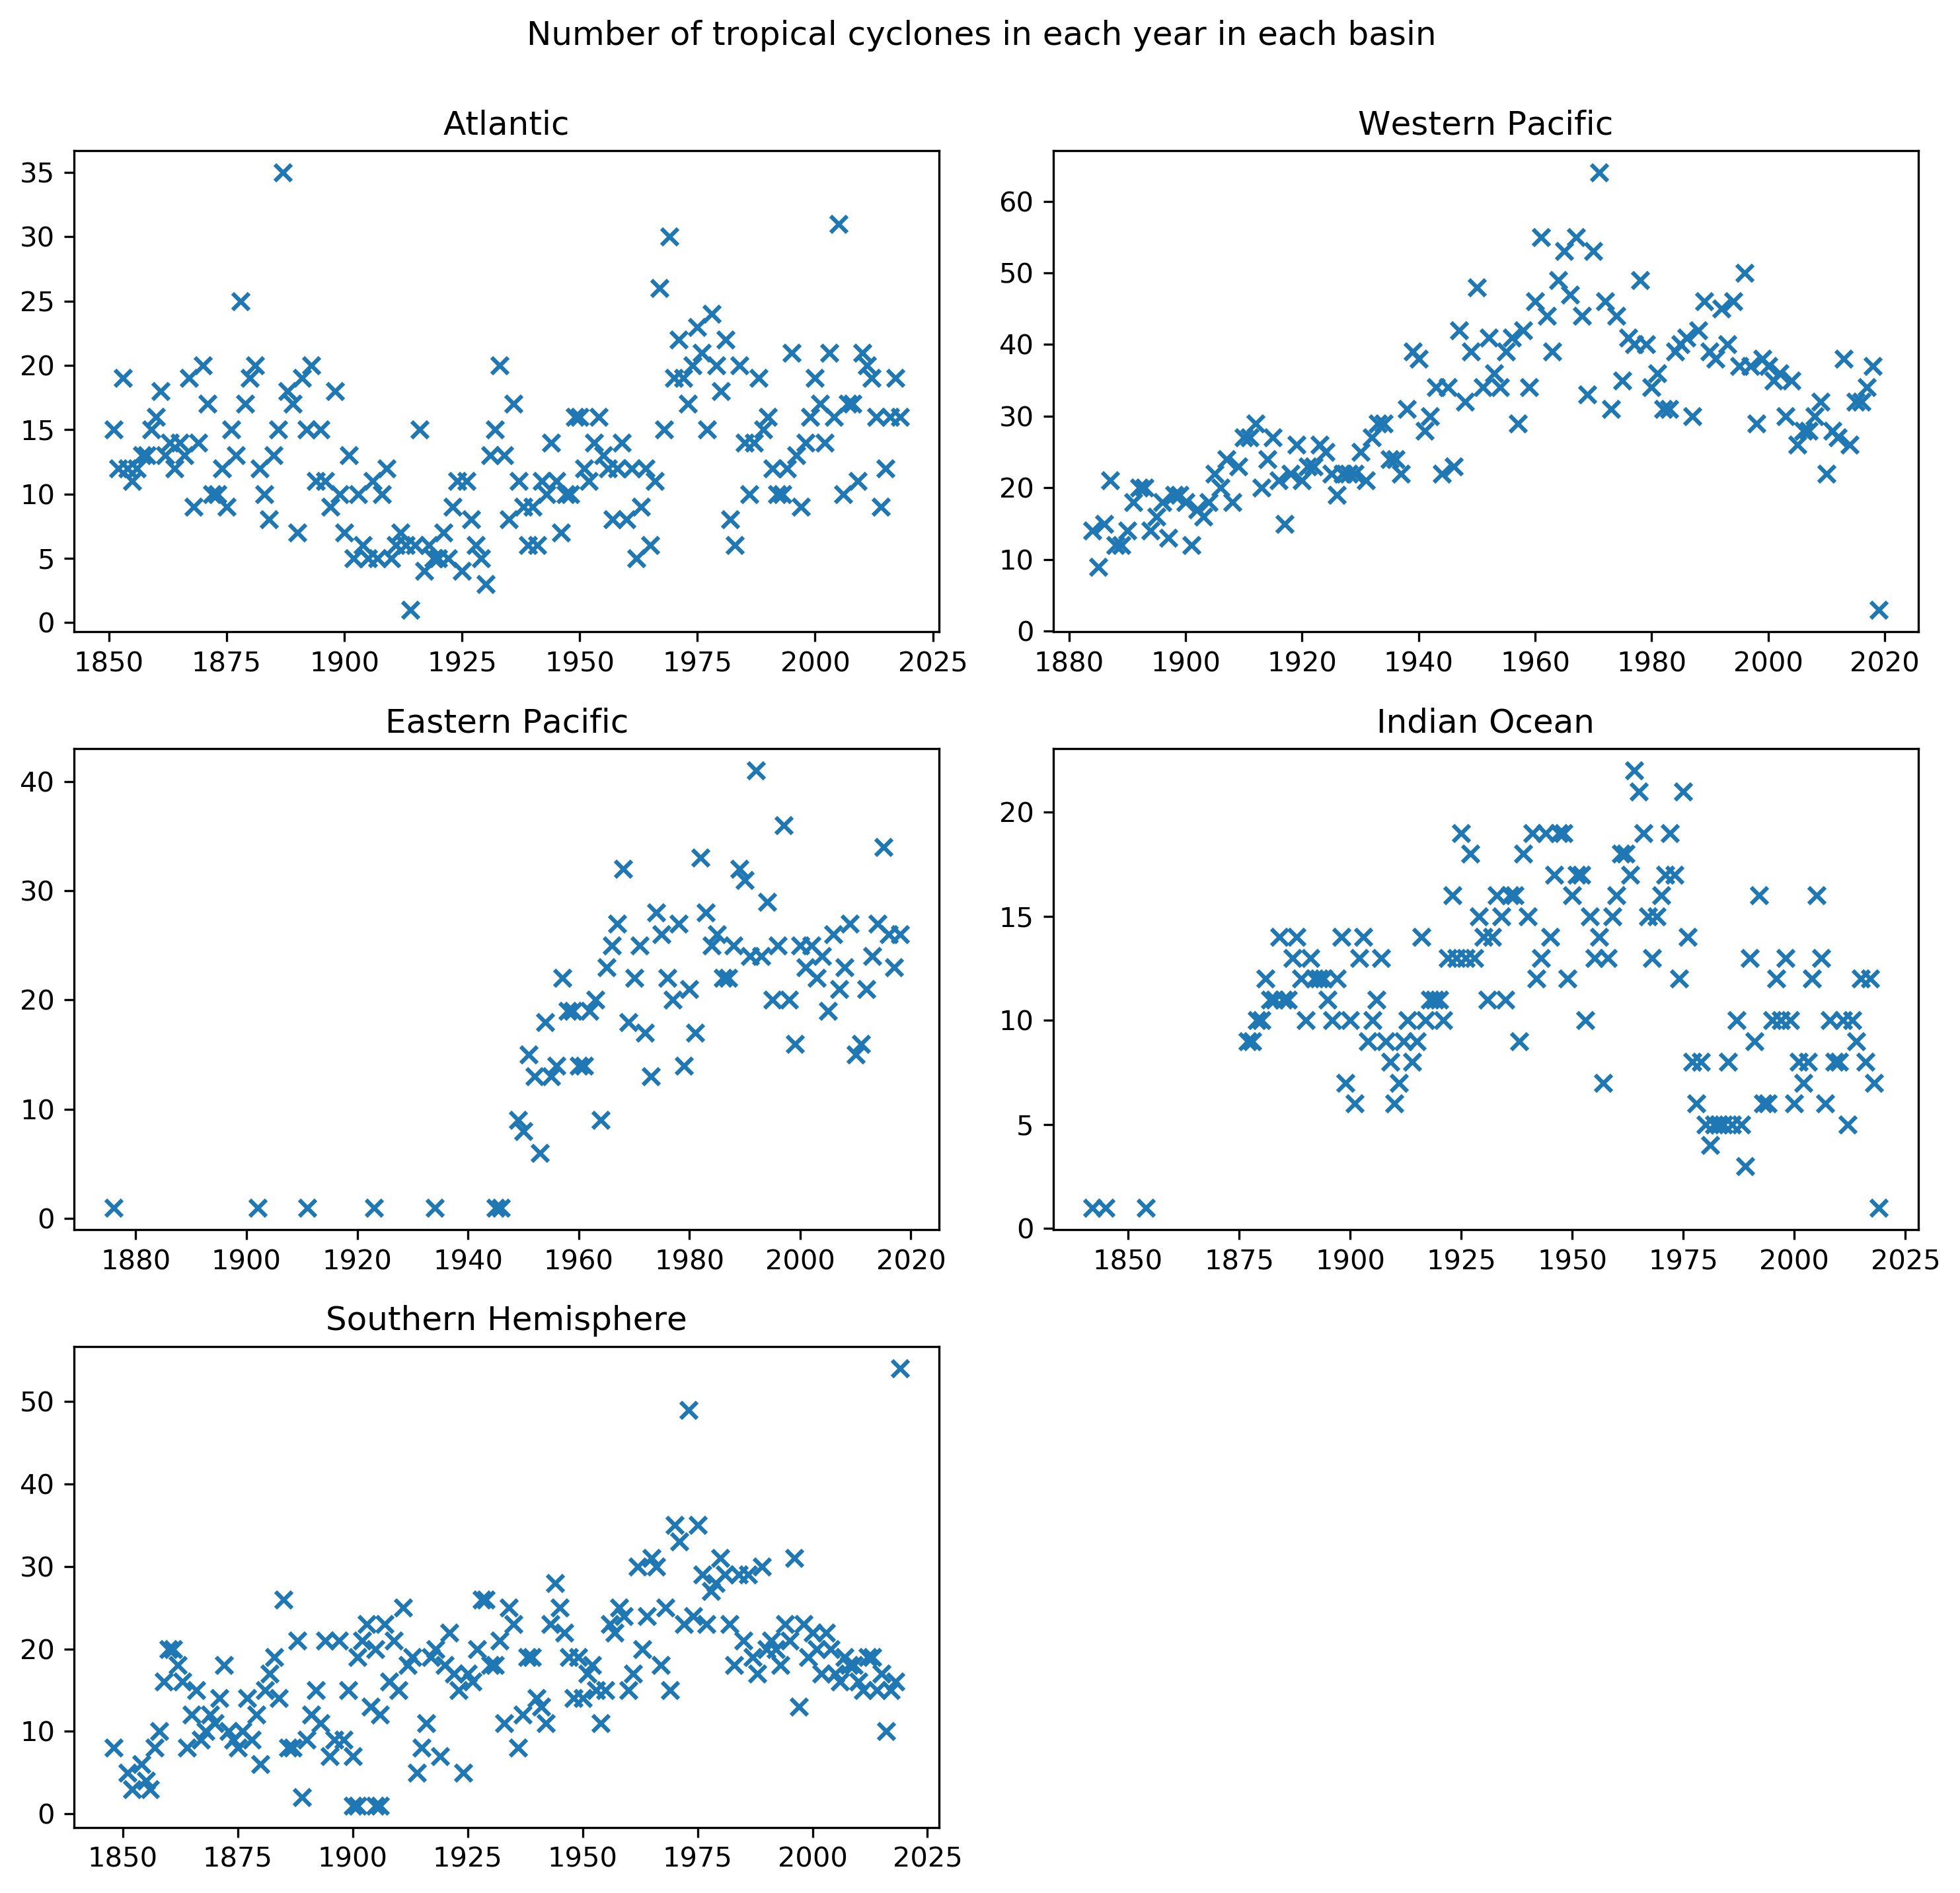

In [45]:
nrows, ncols = 3, 2
fig, ax = plt.subplots(nrows, ncols, dpi=300, figsize=(10,10))
ax[2, 1].axis('off')

basin_longname = ['Atlantic', 'Western Pacific', 'Eastern Pacific', 'Indian Ocean', 'Southern Hemisphere']
row_idx = 0
for idx, basin_prfx in enumerate(['at', 'wp', 'ep', 'io', 'sh']):
    print((idx+0)%3)
    
    if idx%ncols == 0 and idx>0:
        row_idx +=1
        
    basin_data = iris.load('data/{}tracks.nc'.format(basin_prfx))

    nsic, yearic = basin_data.extract('nsic')[0], basin_data.extract('yearic')[0]

    #t=yearic - yearic[0]
    #tt=t[1:] - t[:-1]
    #yr_end = (tt.data > 0)
    #yr_end = np.ma.append(yr_end, True)
    
    yr_end = (nsic.data[1:] == 1)
    yr_end = np.ma.append(yr_end, True)

    masked_n = np.ma.array(nsic.data, mask = ~yr_end)
    yr_plt = np.ma.array(yearic.data, mask = ~yr_end)
    
    # Are the years monotonic?
    print(np.all(np.diff(yr_plt.data)>0))
    
    ax[row_idx, idx % ncols].set_title('{}'.format(basin_longname[idx]))
    ax[row_idx, idx % ncols].scatter(yr_plt, masked_n, marker='x')

fig.suptitle('Number of tropical cyclones in each year in each basin')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.show()
plt.savefig('plots/number_cyclones_per_yr_by_basin.png')

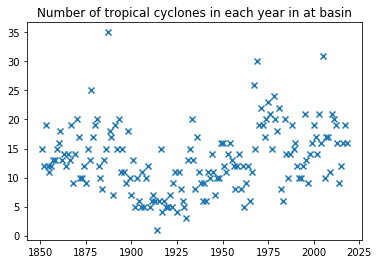

In [27]:
# --tracks.nc, -- = basin_prefix (at, wp, ep, ... etc)
basin = 'at'
basin_data = iris.load('data/{}tracks.nc'.format(basin))
#print(basin_data)
nsic, yearic = basin_data.extract('nsic')[0], basin_data.extract('yearic')[0]
vsmc, monthmc = basin_data.extract('vsmc')[0], basin_data.extract('monthmc')[0]
daymc, latmc = basin_data.extract('daymc')[0], basin_data.extract('latmc')[0]
pcmc, hourmc, lonmc = basin_data.extract('pcmc')[0], basin_data.extract('hourmc')[0], basin_data.extract('longmc')[0]

#t=yearic - yearic[0]
#tt=t[1:] - t[:-1]
#yr_end = (tt.data > 0)
#yr_end = np.ma.append(yr_end, True)

yr_end = (nsic.data[1:] == 1)
yr_end = np.ma.append(yr_end, True)

masked_n = np.ma.array(nsic.data, mask = ~yr_end)
yr_plt = np.ma.array(yearic.data, mask = ~yr_end)

fig, ax = plt.subplots()
ax.set_title('Number of tropical cyclones in each year in {} basin'.format(basin))
ax.scatter(yr_plt, masked_n, marker='x')
plt.show()

In [6]:
basin_data

[<iris 'Cube' of monthmc / (1) (-- : 180; -- : 1542)>,
<iris 'Cube' of yearic / (1) (-- : 1542)>,
<iris 'Cube' of stnamec / (1) (-- : 18; -- : 1542)>,
<iris 'Cube' of latmc / (1) (-- : 180; -- : 1542)>,
<iris 'Cube' of basinic / (1) (-- : 180; -- : 1542)>,
<iris 'Cube' of vsmc / (1) (-- : 180; -- : 1542)>,
<iris 'Cube' of longmc / (1) (-- : 180; -- : 1542)>,
<iris 'Cube' of pcmc / (1) (-- : 180; -- : 1542)>,
<iris 'Cube' of daymc / (1) (-- : 180; -- : 1542)>,
<iris 'Cube' of hourmc / (1) (-- : 180; -- : 1542)>,
<iris 'Cube' of nsic / (1) (-- : 1542)>]

In [28]:
i=0
print(latmc[:,i].data) 
print(lonmc[:,i].data)

[26.10000038 26.29999733 26.5        26.70000076 26.89999962 27.09999847
 27.53333282 27.79999924 27.89999962 28.03333473 28.16666985 28.29999733
 28.43333435 28.63333321 29.         29.47272873 29.97777939 30.5
 31.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.    

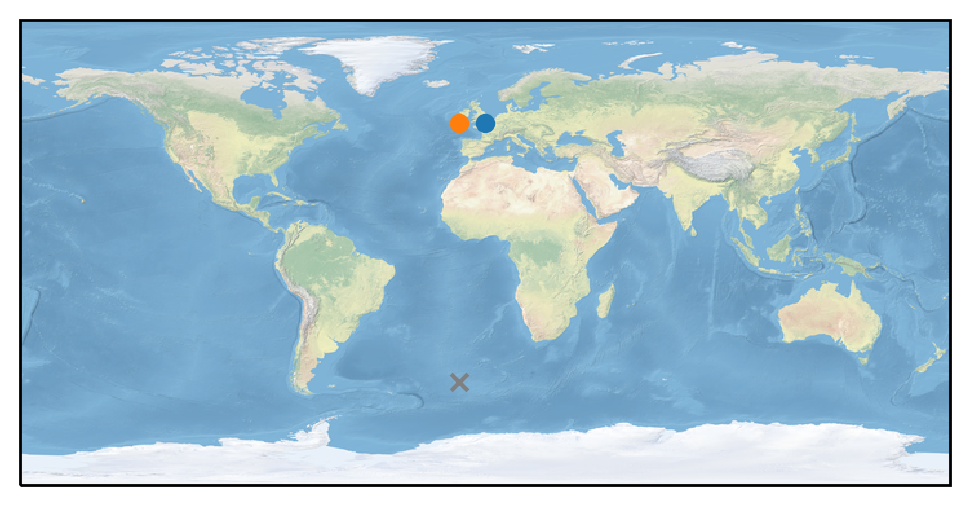

In [33]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

"""
plt.plot(lonmc[0:16,0].data, latmc[0:16,0].data,
         color='red', linestyle='--', linewidth = 0.7,
         transform=ccrs.PlateCarree()
         )
"""

plt.scatter([0], [50],
    transform=ccrs.PlateCarree()
)

plt.scatter([350], [50],
    transform=ccrs.PlateCarree()
)

plt.scatter([-10], [-50], marker = 'x', color = 'grey', 
    transform=ccrs.PlateCarree()
)

plt.show()